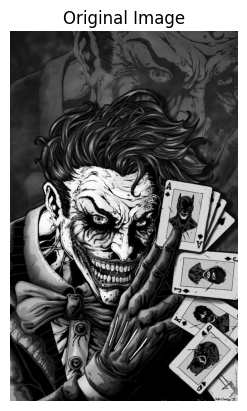

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

image = cv2.imread("Downloads/jok.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


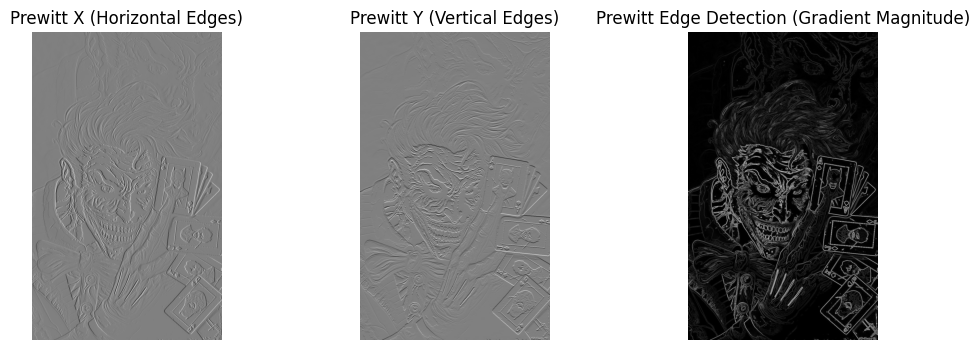

In [5]:

prewitt_x = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1], 
                       [0, 0, 0], 
                       [1, 1, 1]])


prewitt_x_edges = convolve(image.astype(float), prewitt_x)
prewitt_y_edges = convolve(image.astype(float), prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_x_edges**2 + prewitt_y_edges**2)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(prewitt_x_edges, cmap='gray')
plt.title("Prewitt X (Horizontal Edges)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(prewitt_y_edges, cmap='gray')
plt.title("Prewitt Y (Vertical Edges)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title("Prewitt Edge Detection (Gradient Magnitude)")
plt.axis("off")

plt.show()


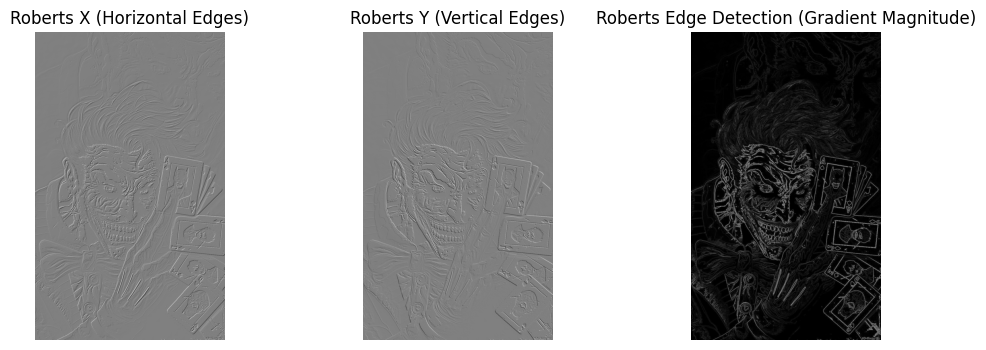

In [6]:

roberts_x = np.array([[1, 0], 
                       [0, -1]])

roberts_y = np.array([[0, 1], 
                      [-1, 0]])


roberts_x_edges = convolve(image.astype(float), roberts_x)
roberts_y_edges = convolve(image.astype(float), roberts_y)
roberts_magnitude = np.sqrt(roberts_x_edges**2 + roberts_y_edges**2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(roberts_x_edges, cmap='gray')
plt.title("Roberts X (Horizontal Edges)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(roberts_y_edges, cmap='gray')
plt.title("Roberts Y (Vertical Edges)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(roberts_magnitude, cmap='gray')
plt.title("Roberts Edge Detection (Gradient Magnitude)")
plt.axis("off")

plt.show()


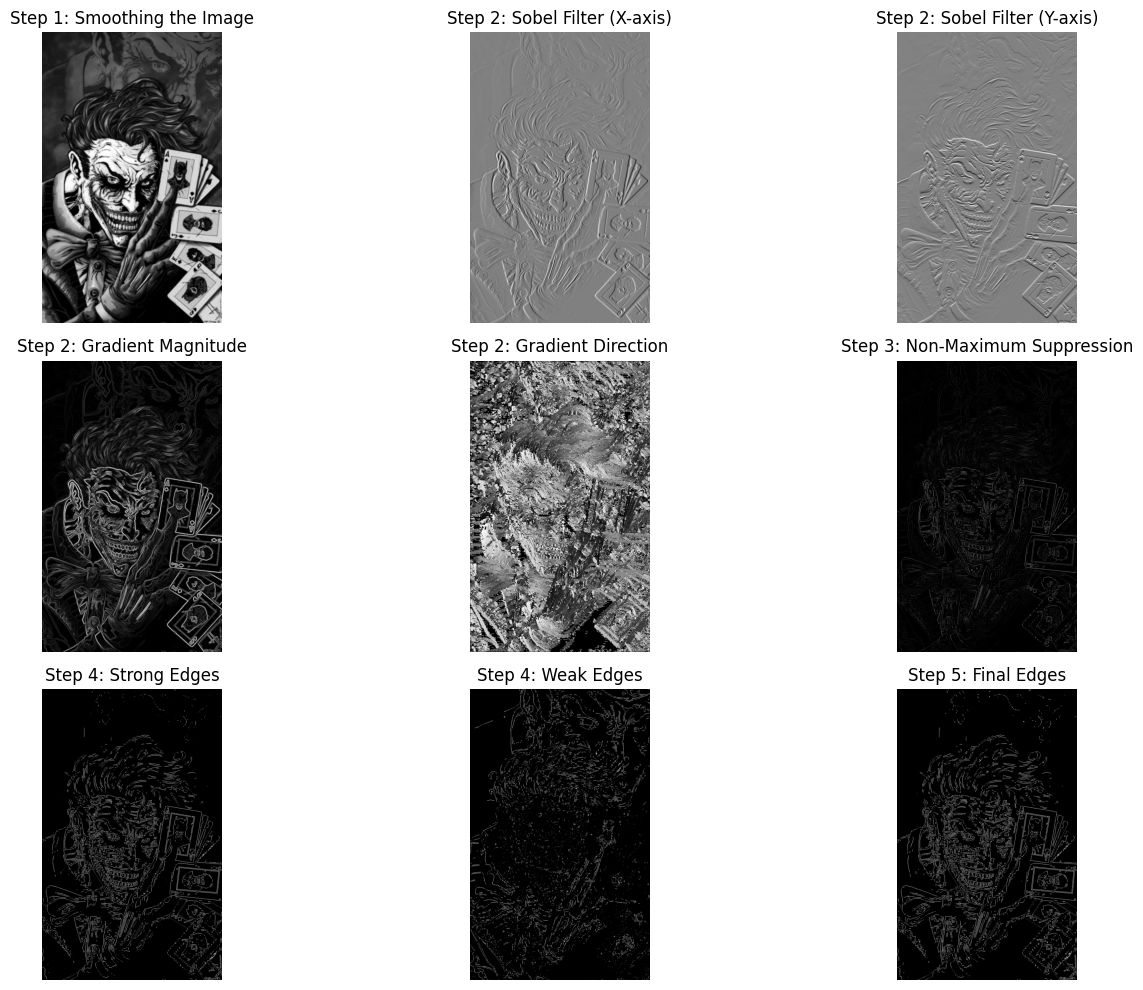

In [9]:


def canny_edge_detection(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    

    blurred_image = cv2.GaussianBlur(img, (5, 5), 1.4)


    Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)

    direction = np.arctan2(Gy, Gx) * (180 / np.pi)  
    direction = np.mod(direction + 180, 180) 
    nms_result = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    rows, cols = gradient_magnitude.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            angle = direction[i, j]

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q, r = gradient_magnitude[i, j+1], gradient_magnitude[i, j-1]
            elif 22.5 <= angle < 67.5:
                q, r = gradient_magnitude[i+1, j-1], gradient_magnitude[i-1, j+1]
            elif 67.5 <= angle < 112.5:
                q, r = gradient_magnitude[i+1, j], gradient_magnitude[i-1, j]
            elif 112.5 <= angle < 157.5:
                q, r = gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]

            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                nms_result[i, j] = gradient_magnitude[i, j]
            else:
                nms_result[i, j] = 0


    high_threshold = np.max(nms_result) * 0.2  
    low_threshold = high_threshold * 0.5

    strong_edges = np.zeros_like(nms_result)
    weak_edges = np.zeros_like(nms_result)
    strong_edges[nms_result >= high_threshold] = 255
    weak_edges[(nms_result >= low_threshold) & (nms_result < high_threshold)] = 50

    final_edges = strong_edges.copy()
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if weak_edges[i, j] == 50:
                if (strong_edges[i-1:i+2, j-1:j+2] == 255).any():
                    final_edges[i, j] = 255
                else:
                    final_edges[i, j] = 0

 
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    titles = [
        'Step 1: Smoothing the Image', 'Step 2: Sobel Filter (X-axis)', 
        'Step 2: Sobel Filter (Y-axis)', 'Step 2: Gradient Magnitude', 
        'Step 2: Gradient Direction', 'Step 3: Non-Maximum Suppression',
        'Step 4: Strong Edges', 'Step 4: Weak Edges', 'Step 5: Final Edges'
    ]
    images = [
        blurred_image, Gx, Gy, gradient_magnitude, direction, nms_result,
        strong_edges, weak_edges, final_edges
    ]

    for ax, img, title in zip(axes.ravel(), images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

canny_edge_detection("Downloads/jok.jpg")


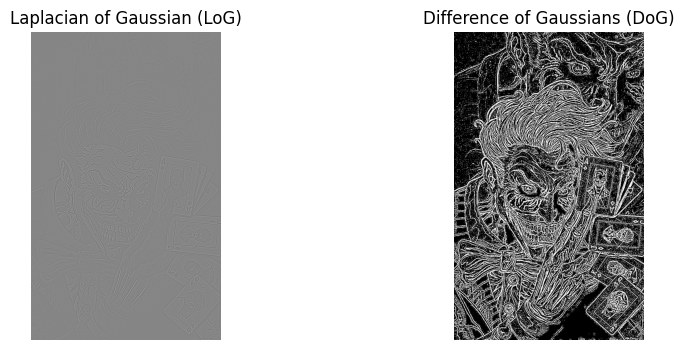

In [8]:

log_kernel = np.array([[0, 0, -1, 0, 0],
                       [0, -1, -2, -1, 0],
                       [-1, -2, 16, -2, -1],
                       [0, -1, -2, -1, 0],
                       [0, 0, -1, 0, 0]])

log_edges = convolve(image.astype(float), log_kernel)


gaussian_1 = cv2.GaussianBlur(image, (5, 5), 1)
gaussian_2 = cv2.GaussianBlur(image, (5, 5), 2)
dog_edges = gaussian_1 - gaussian_2


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(log_edges, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dog_edges, cmap='gray')
plt.title("Difference of Gaussians (DoG)")
plt.axis("off")

plt.show()
